<a href="https://colab.research.google.com/github/sujin421/text-mining-project/blob/main/TM_project_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import time
import re
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter

#워드클라우드 다운 링크 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

In [3]:
!pip install konlpy

from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Hannanum
from konlpy.tag import Okt

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 448 kB 42.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [4]:
# 참고 사이트 https://yeo0.github.io/data/2018/09/24/5.-%EB%A1%9C%EA%B7%B8%EC%9D%B8%EC%9D%B4-%ED%95%84%EC%9A%94%ED%95%9C-%EC%82%AC%EC%9D%B4%ED%8A%B8%EC%97%90%EC%84%9C%EC%9D%98-%ED%81%AC%EB%A1%A4%EB%A7%81/
# 참고 사이트 2 https://hashcode.co.kr/questions/9084/%EC%9E%A1%ED%94%8C%EB%9E%98%EB%8B%9B-%EB%A1%9C%EA%B7%B8%EC%9D%B8-%ED%9B%84-%EC%8A%A4%ED%81%AC%EB%A0%88%EC%9D%B4%ED%95%91-%EB%AC%B8%EC%9D%98%EB%93%9C%EB%A6%BD%EB%8B%88%EB%8B%A4-%E3%85%9C%E3%85%9C

# 로그인 할 url
url = "https://www.jobplanet.co.kr/users/sign_in?_nav=gb"
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
headers = {'Content-type': 'application/json', 'Accept': 'text/plain', 'User-Agent':user_agent}
login_data = {'user':{'email':'hsmy31@hanyang.ac.kr', 'password':'rhkwpgksmswnd!', 'remember_me':'true'}}
session = requests.session()

# 로그인 실행
login_response = session.post(url, json = login_data, headers = headers)

In [5]:
def ind_reviews(code):
    url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code)
    response =  session.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    num = soup.find('span', class_='num') # 리뷰 개수 확인
    num = int(num.get_text().strip())
    import math, random
    pages = math.ceil(num / 10)
    page = random.sample(range(1, pages),30)
    reviews = {}
    for i in range(1, pages+2): # 페이지를 랜덤으로 하여 300개의 리뷰 추출
        time.sleep(1)
        url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code) + "&page="+ str(i)
        response =  session.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        label = soup.find_all('h2', class_="us_label") # 한 줄 리뷰 추출
        # 추출한 리뷰에서 태그를 제외한 텍스트만 추출하여 labels 리스트에 저장
        labels = [label.get_text().strip() for label in label[:]]
        star = soup.find_all('div', class_="star_score") # 별점이 포함된 div 추출
        # 추출한 div에서 별점을 나타내는 width 속성의 숫자로 된 부분을 stars 리스트에 저장
        stars = re.findall('[0-9]+[.]+[0-9]', str(star))
        # reviews 딕셔너리에 '리뷰: 별점' 형식으로 추가
        for j in range(len(labels)):
            reviews[labels[j][5:-1]] = stars[j].replace('.0','')
    return reviews

In [6]:
# 각 산업군의 기업 리뷰 스크래핑
reviews1 = dict(ind_reviews(1001))
reviews2 = dict(ind_reviews(900))
reviews3 = dict(ind_reviews(704))
reviews4 = dict(ind_reviews(1004))

In [7]:
len(reviews1)

774

In [8]:
#특수문자 제거
def sub(dic):
    dic = [re.sub(r"[^가-힣A-Za-z0-9]", " ", str(content)) for content in dic]
    return dic

In [9]:
#산업군 별 키워드 추출 후 리스트 생성
def extend(text):
    kkma=Kkma()
    temp=[]
    for i in text:
        temp.extend(kkma.nouns(i))
    return temp

In [10]:
Goverment=extend(sub(reviews1))
Bank=extend(sub(reviews2))
IT=extend(sub(reviews3))
Accounting=extend(sub(reviews4))

In [11]:
len(Goverment)

7192

In [20]:
vocab_stopwords=['있음','기업','업무','회사','직장','분위기','사람','직원','근무']

In [21]:
def cnt(title):

  for i,v in enumerate(title):
    if len(v)<2:
      title.pop(i)

  for i,v in enumerate(title):
    if v in vocab_stopwords:
      title.pop(i)
    
  count=Counter(title)

  words = dict(count.most_common(50))
  return words

In [22]:
Goverment_vocab=cnt(Goverment)

In [23]:
Goverment_vocab

{'가능': 27,
 '강도': 24,
 '경력': 20,
 '경험': 61,
 '계약': 46,
 '계약직': 34,
 '공공': 58,
 '공공기관': 51,
 '공기업': 27,
 '공무원': 52,
 '관련': 17,
 '근무환경': 15,
 '급여': 27,
 '기관': 100,
 '느낌': 14,
 '다양': 40,
 '단점': 13,
 '때문': 14,
 '라벨': 15,
 '만족': 17,
 '문화': 37,
 '발전': 18,
 '보수적': 13,
 '보장': 24,
 '복지': 43,
 '본인': 14,
 '부서': 18,
 '사내': 14,
 '사업': 16,
 '사회': 19,
 '생각': 47,
 '서울': 14,
 '수평적': 13,
 '시간': 19,
 '안정적': 31,
 '연봉': 15,
 '워라벨': 22,
 '위치': 15,
 '인턴': 14,
 '자기': 21,
 '자유': 19,
 '장점': 20,
 '정규직': 24,
 '조직': 32,
 '지방': 20,
 '지역': 15,
 '지원': 14,
 '체계': 16,
 '추천': 29,
 '환경': 40}

In [24]:
Bank_vocab=cnt(Bank)

In [25]:
Bank_vocab

{'가능': 29,
 '가능성': 24,
 '강도': 24,
 '개인': 19,
 '경력': 35,
 '경험': 40,
 '규모': 25,
 '금융': 39,
 '급여': 33,
 '기회': 22,
 '능력': 24,
 '다양': 47,
 '대우': 31,
 '대표': 25,
 '만큼': 21,
 '문화': 73,
 '발전': 39,
 '보수적': 33,
 '보험': 25,
 '복지': 47,
 '본인': 27,
 '생각': 59,
 '성과': 19,
 '성장': 53,
 '수평적': 20,
 '시간': 24,
 '신입': 23,
 '안정적': 40,
 '업계': 41,
 '연봉': 67,
 '영업': 22,
 '외국계': 20,
 '운영': 22,
 '운용': 21,
 '은행': 37,
 '이상': 23,
 '자산': 19,
 '자유': 25,
 '자체': 20,
 '장점': 19,
 '정도': 19,
 '조직': 24,
 '지원': 19,
 '체계': 24,
 '최고': 36,
 '추천': 49,
 '커리어': 25,
 '투자': 23,
 '하나': 20,
 '환경': 28}

In [26]:
IT_vocab=cnt(IT)

In [27]:
IT_vocab

{'가능': 12,
 '가지': 10,
 '개발': 23,
 '개발자': 12,
 '개인': 7,
 '경우': 7,
 '경험': 22,
 '구조': 7,
 '급여': 7,
 '나름': 7,
 '네트워크': 7,
 '노력': 8,
 '다양': 24,
 '대기업': 7,
 '대우': 13,
 '대표': 9,
 '문화': 14,
 '발전': 11,
 '복지': 21,
 '본인': 7,
 '부족': 7,
 '비전': 7,
 '사내': 11,
 '사업': 16,
 '생각': 11,
 '서비스': 7,
 '성장': 22,
 '스타트': 11,
 '스타트업': 11,
 '시간': 8,
 '신입': 7,
 '안정적': 12,
 '업계': 10,
 '업체': 11,
 '연봉': 14,
 '운영': 7,
 '워라벨': 9,
 '월급': 7,
 '유지': 7,
 '자기': 13,
 '자유': 19,
 '자체': 7,
 '중소기업': 7,
 '진행': 11,
 '체계': 14,
 '추천': 25,
 '커리어': 8,
 '통신': 13,
 '한국': 7,
 '환경': 16}

In [28]:
Accounting_vocab=cnt(Accounting)

In [31]:
!apt-get install
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...


In [32]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/t

In [33]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib 
from matplotlib import rc

path ='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


# Word Cloud 

In [50]:
from google.colab import files
uploaded=files.upload()

Saving coin.png to coin.png


In [41]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator
 
def wcloud(imagetext,text):
  icon=Image.open(imagetext)
  icon_coloring=np.array(icon)
  image_color = ImageColorGenerator(icon_coloring)
  mask = Image.new("RGB", icon.size, (255,255,255))
  mask.paste(icon,icon)
  mask = np.array(mask)

  wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', 
                 background_color='white',                              #배경색
                 width=1500, height=1000,                              #사이즈설정 
                  mask=mask
                )                                                       #마스크설정   
 
  cloud = wc.generate_from_frequencies(text)                      #사전형태의 데이터
 
  plt.figure(figsize=(10,10))                                           #액자사이즈설정
  plt.axis('off')                                                       #테두리 선 없애기
  plt.imshow(cloud,interpolation="bilinear")
  plt.imshow(wc.recolor(color_func=image_color))

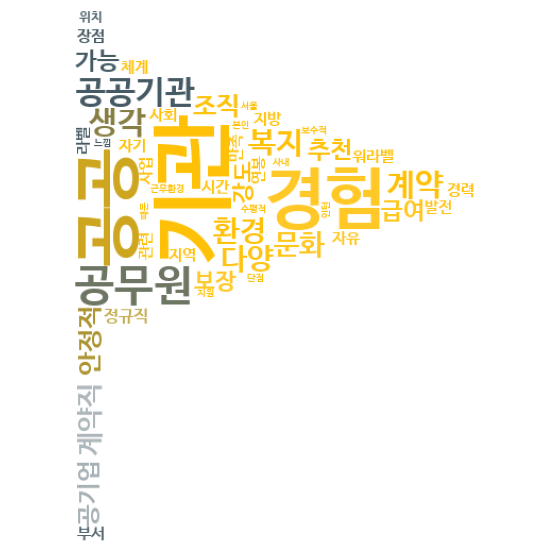

In [56]:
wcloud("govermentimage.png",Goverment_vocab)

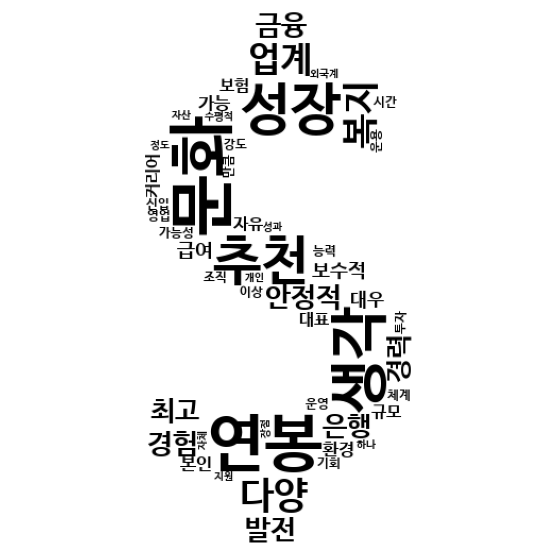

In [53]:
wcloud("bankimage.png",Bank_vocab)

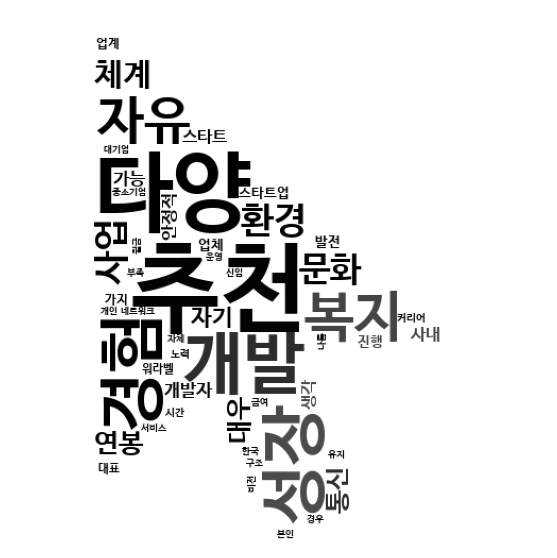

In [54]:
wcloud("itimage.png",IT_vocab)

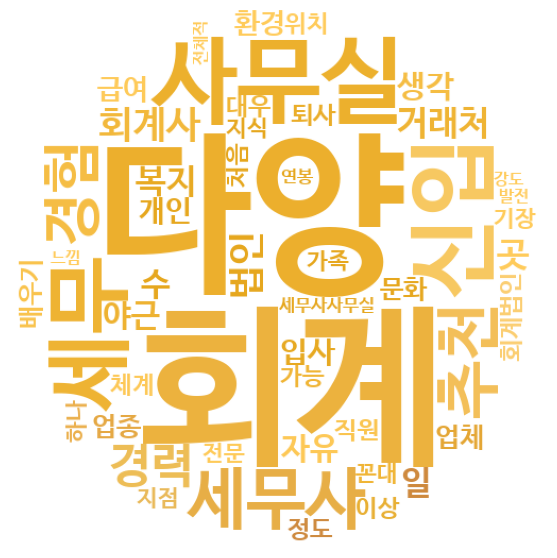

In [55]:
wcloud("accountingimage.png",Accounting_vocab)